<a href="https://colab.research.google.com/github/Chitrangig/Project/blob/main/ImageClassificationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Image Classification on Dolphin, Zebra and Birds
# Data Gathering-->

!pip install bing-image-downloader

In [ ]:
!mkdir images

In [3]:
from bing_image_downloader import downloader
downloader.download("dolphins",limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/dolphins


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://img1.grunge.com/img/gallery/false-facts-about-dolphins-you-always-thought-were-true/intro-1500661774.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/a7/67/3d/a7673d9e408ed199dff1290a8d3cc6b6.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://2.bp.blogspot.com/-zpgDUk2iiLw/TlJxAwop8XI/AAAAAAAAAOE/XsSgGyYrRIw/s1600/Flippeddolphinsmile.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.rd.com/wp-content/uploads/2019/03/hector-dolphin.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.storytrender.com/wp-content/uploads/2018/10/4_CATERS_DIRTY_DANCING_DOLPHINS_05-1024x683.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://4.bp.blogspot.com/-Ji10i7JwvE4/TnPA78Fw3MI/AAAAAAAAAI0/XZmMcrOPjb8/s1600/dolphin3.jpg
[%] File Downloaded !

[%] Downloading 

In [4]:
downloader.download("zebra",limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/zebra


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://1.bp.blogspot.com/-aOxDnC3RSrI/TaLU0qlpcFI/AAAAAAAACNU/pisguSiYW7k/w1200-h630-p-k-no-nu/zebra.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://1.bp.blogspot.com/-sXjtE_uZfJs/TmG5NqgM6aI/AAAAAAAACcA/U0D0lNXUTy4/s1600/true-wildlife-mountain+zebra-3.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.britannica.com/85/219885-050-92BF3722/two-zebras-Serengeti-National-Park-Tanzania.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://1.bp.blogspot.com/-r-FfmCUekis/T_bG2GMPgpI/AAAAAAAAAPM/EMsctauoYJA/s1600/Grevy%2527s_Zebra-3.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://4.bp.blogspot.com/-m-lXEo9VWnw/T_T2-NhNWkI/AAAAAAAAALQ/_xUW35Ylp9Q/s1600/mountain-zebra.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://1.bp.blogspot.com/-lK-e9YjTEBY/T_T23OyhnBI/AAAAAAAAAK4/vSwtpaM_1o8/s

In [15]:
downloader.download("parrots",limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/parrots


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://animalia-life.com/data_images/parrot/parrot1.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://greatlakesledger.com/wp-content/uploads/2018/07/Alberta-Neuroscientists-Find-Out-Why-Parrots-Are-Not-so-Bird-Brained.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://4.bp.blogspot.com/-KXtlhW9wja8/UI40mr7HzCI/AAAAAAAADQE/JeSRHZ8r3h8/s1600/Parrot-1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://media.buzzle.com/media/images-en/photos/birds/parrot/1200-14085076-eclectus-parrot.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://pixfeeds.com/images/birds/parrots/1280-1200-480443304-colorful-parrots.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://blog.parrotessentials.co.uk/wp-content/uploads/2018/03/Eclectus-Parrot-Male-_-Eric-Kilby-_-Flickr.jpg
[%] File Downloaded !

[%] Dow

In [6]:
# Data Preprocessing--->

import os         #to manage switching from one to other folder
import matplotlib.pyplot as plt  #for images
import numpy as np #for numerical 
from skimage.io import imread #to read images
from skimage.transform import resize

target= [] #output emplty list
images= [] #data 2D
flat_data = [] #will be passed to create ML model

#how to examine or take up data

DATADIR = '/content/images' #path from where images have to be considered
CATEGORIES = ['parrots', 'dolphins', 'zebra']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) #label encoding the values
  path = os.path.join(DATADIR,category) #Create path to use all the images
  for img in os.listdir(path):
    img_array= imread(os.path.join(path,img))
    #print(img_array)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3)) #resizing, normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten()) #flattening
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)








<BarContainer object of 3 artists>

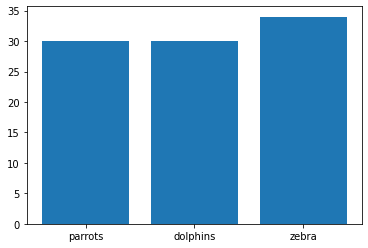

In [19]:
unique,count= np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [8]:
#Splitting data into training & testing
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [9]:
#Classification Algorithm- SVM
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import train_test_split
from sklearn import svm
#from sklearn.svm import SVC
param_grid = [
              { 'C' :[1,10,100,1000],'kernel' :['linear']},
              { 'C' :[1,10,100,1000],'gamma' :[0.001,0.0001],'kernel' :['rbf']}
             ]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)



GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [10]:
y_pred = clf.predict(x_test)
y_pred

from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_pred,y_test)

0.8620689655172413

In [11]:
confusion_matrix(y_pred,y_test)


array([[ 6,  0,  3],
       [ 0, 10,  0],
       [ 1,  0,  9]])

In [12]:
#Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [13]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://images.hindustantimes.com/rf/image_size_630x354/HT/p2/2020/11/04/Pictures/_f6c2c69c-1eb4-11eb-99e1-1f704b24b706.jpg
(356, 630, 3)
Predicted Output:parrots


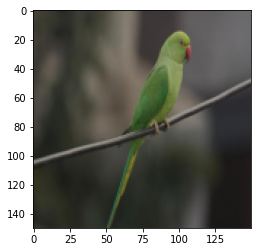

In [18]:
#testing new image
flat_data= []
url = input('Enter your URL')
img = imread(url)
img_resized= resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted Output:{y_out}')
